In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\ML\data_clean.csv", index_col=0)
df

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
1,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
7,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818,1,40,4,1,5.0,3.82,108.8,168.7,38.2,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,6.0,7.0
15556,124819,1,2,4,1,NaN,0.07,15.4,93.7,17.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820,2,7,3,1,NaN,1.22,22.9,123.3,15.1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821,1,63,4,1,2.0,3.71,79.5,176.4,25.5,3,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,9.0


In [3]:
df.shape

(13137, 18)

In [4]:
df_age_filter = df[(df['Age'] >= 20) & (df['Age'] <= 60)]
print(df_age_filter.head())
print(df_age_filter.shape)

      SEQN  Gender  Age  Race  CountryofBirth  Education  FamIncomeRatio  \
3   109266       2   29     6               2        5.0            5.00   
8   109271       1   49     3               1        2.0             NaN   
10  109273       1   36     3               1        4.0            0.83   
21  109284       2   44     1               2        2.0             NaN   
23  109286       2   33     6               2        5.0            1.36   

    Weight  Height   BMI  Diabetes  ModerateWorkActivity  \
3     97.1   160.2  37.8         2                   2.0   
8     98.8   182.3  29.7         2                   1.0   
10    74.3   184.2  21.9         2                   2.0   
21    91.1   152.7  39.1         2                   2.0   
23    72.6   158.4  28.9         2                   2.0   

    ModerateRecreationalActivities     Depressed  PoorAppetiteOvereating  \
3                              1.0  5.397605e-79            5.397605e-79   
8                             

In [5]:
df_age_filter.isnull().sum()

SEQN                                 0
Gender                               0
Age                                  0
Race                                 0
CountryofBirth                       0
Education                            0
FamIncomeRatio                     755
Weight                               0
Height                               0
BMI                                  0
Diabetes                             0
ModerateWorkActivity                 0
ModerateRecreationalActivities       0
Depressed                          346
PoorAppetiteOvereating             346
Smoking                           3470
SleepHoursWeekdays                  41
SleepHoursWeekend                   48
dtype: int64

In [7]:
df_age_filter['FamIncomeRatio'].fillna(df_age_filter['FamIncomeRatio'].mean(), inplace=True)
df_age_filter['Depressed'].fillna(df_age_filter['Depressed'].median(), inplace=True)
df_age_filter['PoorAppetiteOvereating'].fillna(df_age_filter['PoorAppetiteOvereating'].median(), inplace=True)
df_age_filter['Smoking'].fillna(df_age_filter['Smoking'].median(), inplace=True)
df_age_filter['SleepHoursWeekdays'].fillna(df_age_filter['SleepHoursWeekdays'].mean(), inplace=True)
df_age_filter['SleepHoursWeekend'].fillna(df_age_filter['SleepHoursWeekend'].mean(), inplace=True)

In [8]:
df_age_filter.isnull().any()

SEQN                              False
Gender                            False
Age                               False
Race                              False
CountryofBirth                    False
Education                         False
FamIncomeRatio                    False
Weight                            False
Height                            False
BMI                               False
Diabetes                          False
ModerateWorkActivity              False
ModerateRecreationalActivities    False
Depressed                         False
PoorAppetiteOvereating            False
Smoking                           False
SleepHoursWeekdays                False
SleepHoursWeekend                 False
dtype: bool

In [13]:
obese_condition = [(df_age_filter['BMI'] < 18.5),
                   (df_age_filter['BMI'] >= 18.5) & (df_age_filter['BMI'] < 25.0),
                   (df_age_filter['BMI'] >= 25.0) & (df_age_filter['BMI'] < 30.0),
                   (df_age_filter['BMI'] > 30.0)]

# 1 - Under Weight
# 2 - Healthy
# 3 - Overweight
# 4 - Obese
obese_value = [1, 2, 3, 4]

df_age_filter['obesity'] = np.select(obese_condition, obese_value, default = 1)

<ipython-input-13-3a4ec00aaa45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_filter['obesity'] = np.select(obese_condition, obese_value, default = 1)


Counter({4: 2392, 3: 1676, 2: 1365, 1: 123})


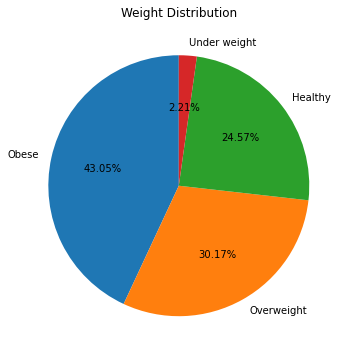

In [12]:
import collections
from collections import Counter
count = Counter(df_age_filter['obesity'])
print(count)
plt.figure(figsize=(6, 6))
labels = ['Obese','Overweight', 'Healthy', 'Under weight']
plt.pie([float(count[v]) for v in count], labels=labels, startangle = 90, autopct='%1.2f%%')

plt.title('Weight Distribution')
plt.show()

In [14]:
# Second Weight Level Column
obese_condition_2 = [(df_age_filter['BMI'] < 30.0),
                   (df_age_filter['BMI'] > 30.0)]

# 1 - Not Obese
# 2 - Obese
obese_value_2 = [1, 2]

df_age_filter['obesity2'] = np.select(obese_condition_2, obese_value_2, default = 1)
df_age_filter.drop(['obesity'], axis=1, inplace=True)
df_age_filter.head()

<ipython-input-14-05a983e131a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_filter['obesity2'] = np.select(obese_condition_2, obese_value_2, default = 1)
E:\anaconda_1\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity2
3,109266,2,29,6,2,5.0,5.000000,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,2.0,7.5,8.0,2
8,109271,1,49,3,1,2.0,2.582679,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0,1
10,109273,1,36,3,1,4.0,0.830000,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,1
21,109284,2,44,1,2,2.0,2.582679,91.1,152.7,39.1,2,2.0,2.0,5.397605e-79,5.397605e-79,2.0,8.0,10.0,2
23,109286,2,33,6,2,5.0,1.360000,72.6,158.4,28.9,2,2.0,2.0,5.397605e-79,5.397605e-79,2.0,8.5,9.0,1


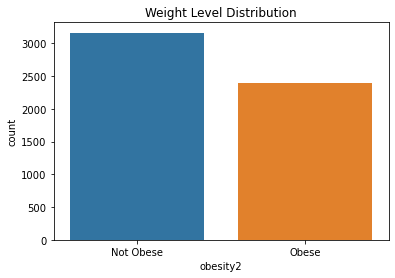

In [17]:
# Obesity distribution plot
import seaborn as sns
sns.countplot(x='obesity2', data=df_age_filter)
plt.title('Weight Level Distribution')
positions=(0, 1)
labels=("Not Obese", "Obese")
plt.xticks(positions, labels)
plt.show();

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
#normalizing the data
scaler = MinMaxScaler(feature_range = (0,1))
normalized_data = scaler.fit_transform(df_age_filter)
columns = ['Gender','Age','Race','CountryofBirth','Education','FamIncomeRatio', 'Height','Diabetes','ModerateWorkActivity', 'ModerateRecreationalActivities','Depressed','PoorAppetiteOvereating','Smoking','SleepHoursWeekdays','SleepHoursWeekend', 'obesity2']
normalized_df = pd.DataFrame(normalized_data, columns=columns)
normalized_df['obesity2'] = normalized_df['obesity2'].astype(int)
normalized_df.head()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Height,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity2
0,1.0,0.225,0.833333,0.010204,0.500,1.000000,0.424818,0.125,0.125,0.0,0.000000,0.000000,0.5,0.458333,0.500000,1
1,0.0,0.725,0.333333,0.000000,0.125,0.516536,0.747445,0.125,0.000,1.0,0.142857,0.000000,0.0,0.666667,0.916667,0
2,0.0,0.400,0.333333,0.000000,0.375,0.166000,0.775182,0.125,0.125,0.0,0.285714,0.222222,0.0,0.375000,0.500000,0
3,1.0,0.600,0.000000,0.010204,0.125,0.516536,0.315328,0.125,0.125,1.0,0.000000,0.000000,0.5,0.500000,0.666667,1
4,1.0,0.325,0.833333,0.010204,0.500,0.272000,0.398540,0.125,0.125,1.0,0.000000,0.000000,0.5,0.541667,0.583333,0


In [24]:
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [25]:
svm_clf = SVC(kernel='rbf',probability=True)
svm_clf.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred_svm = svm_clf.predict(X_test)
# accuracy calculation
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_svm))

Accuracy: 0.6348920863309353


In [26]:
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       641
           1       0.64      0.32      0.43       471

    accuracy                           0.63      1112
   macro avg       0.64      0.59      0.58      1112
weighted avg       0.64      0.63      0.60      1112



In [27]:
#Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred_log = log_reg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_log))

Accuracy: 0.6133093525179856


In [28]:
print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       641
           1       0.57      0.35      0.43       471

    accuracy                           0.61      1112
   macro avg       0.60      0.58      0.57      1112
weighted avg       0.60      0.61      0.59      1112



In [29]:
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train, Y_train)

Y_pred_dt = dt_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_dt))

Accuracy: 0.5755395683453237


In [30]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       641
           1       0.50      0.50      0.50       471

    accuracy                           0.58      1112
   macro avg       0.57      0.57      0.57      1112
weighted avg       0.58      0.58      0.58      1112



In [31]:
# Random Forest Model
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train,Y_train)

Y_pred_rf = rand_forest.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_rf))

# classification report
print(classification_report(Y_test, Y_pred_rf))

Accuracy: 0.6339928057553957
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       641
           1       0.59      0.45      0.51       471

    accuracy                           0.63      1112
   macro avg       0.62      0.61      0.61      1112
weighted avg       0.63      0.63      0.62      1112



In [33]:
model_svm = svm_clf.fit(X_train, Y_train)
probs_svm = model_svm.predict_proba(X_test)[:, 1]

model_lr = log_reg.fit(X_train, Y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1] # keep the probabilities for positive outvcomes

model_dt = dt_clf.fit(X_train, Y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = rand_forest.fit(X_train,Y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

In [34]:
from sklearn.metrics import auc, precision_recall_curve

# calculate precision and recall for each model
precision_svm, recall_svm, _ = precision_recall_curve(Y_test, probs_svm)
auc_svm = auc(recall_svm, precision_svm)

precision_lr, recall_lr, _ = precision_recall_curve(Y_test, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(Y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _  = precision_recall_curve(Y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

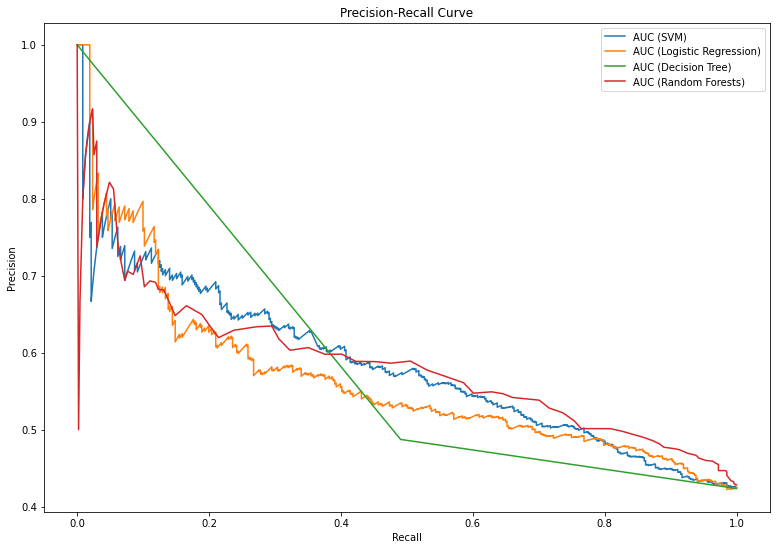

In [35]:
#plot the Precision-Recall Curves for each model
plt.figure(figsize=(13, 9))
plt.plot(recall_svm, precision_svm, label='AUC (SVM)')
plt.plot(recall_lr, precision_lr, label='AUC (Logistic Regression)')
plt.plot(recall_dt, precision_dt, label='AUC (Decision Tree)')
plt.plot(recall_rf, precision_rf, label='AUC (Random Forests)')


plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [36]:
print(f'AUC of Logistic Regression: {auc_lr:.2f}')
print(f'AUC of SVM: {auc_svm:.2f}')
print(f'AUC of Random Forest: {auc_rf:.2f}')
print(f'AUC of Decision Tree: {auc_dt:.2f}')

AUC of Logistic Regression: 0.56
AUC of SVM: 0.58
AUC of Random Forest: 0.58
AUC of Decision Tree: 0.60


In [1]:
# Made by Urvashi Dhand 
# Mtech cse ai 